In [55]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
from collections import defaultdict

BASEDIR = "/data1/shahs3/users/sunge/cnv_simulator"
DATADIR = f"{BASEDIR}/data"

## Plot simulated ground-truth CNV profiles

In [147]:
# Load CNV profile data
test_name = "minitest_c3_4"
group_name = ""
if group_name == "":
    cnv_profile_df = pd.read_csv(f"{DATADIR}/small_cnv_profiles/{test_name}_cnv_profile.tsv", sep="\t")
else:
    cnv_profile_df = pd.read_csv(f"{DATADIR}/small_cnv_profiles/{test_name}_{group_name}_cnv_profile.tsv", sep="\t")

data_cnv_profile_df = cnv_profile_df.loc[cnv_profile_df["chr"] != 0]
clone_cnv_profile_df = cnv_profile_df.loc[cnv_profile_df["chr"] == 0]
clone_cell_count_lst = [
    len(row["cell_barcode"].split(","))
    for _, row in clone_cnv_profile_df.iloc[1:].iterrows()
]

# Set figure directory and make if it doesn't exist
FIGDIR = f"{BASEDIR}/figs/{test_name}"
if not os.path.exists(FIGDIR):
    os.makedirs(FIGDIR)

data_cnv_profile_df

,clone,chr,start,end,state,copy_number,size,cell_barcode,cell_group
4,0,1,0,34746484,0,2,34746484.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."
5,0,1,34746484,42997918,4,6,8251434.0,"110716-R15-C52,110716-R16-C19,110716-R17-C61,1...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
6,0,1,42997918,47153088,0,2,4155170.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."
7,0,1,47153088,50329235,6,8,3176147.0,"110716-R13-C20,110716-R15-C52,110716-R16-C19,1...","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
8,0,1,50329235,205679562,0,2,155350327.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."
9,0,1,205679562,212041234,0,2,6361672.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."
10,0,1,212041234,249250621,0,2,37209387.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."
11,0,2,0,68247070,0,2,68247070.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."
12,0,2,68247070,73136936,-1,1,4889866.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."
13,0,2,73136936,162805490,0,2,89668554.0,"128729A-R57-C14,128624A-R14-C20,128692A-R42-C2...","8,8,11,6,11,5,11,1,6,1,5,1,11,11,1,7,5,1,11,1,..."


In [152]:
copynumber_colors = {
    "0": "#2C78B2",  # Dark blue
    "1": "#94C4DB",  # Light blue
    "2": "#C5C5C5",  # Gray
    "3": "#FCC484",  # Light orange
    "4": "#FA8154",  # Orange
    "5": "#DD4031",  # Red-orange
    "6": "#A9000D",  # Dark red
    "7": "#8C033A",  # Burgundy
    "8": "#6A1B9A",  # Medium purple
    "9": "#4A148C",  # Dark purple
    "10": "#38006B",  # Very dark purple
    "11": "#2E0057",  # Deep purple
    "12": "#240043",  # Almost black purple
    "13": "#1A002F",  # Darkest purple
    "14": "#12001C",  # Near-black purple
}

def plot_true_cnv(cnv_profile_df, n_cells_per_clone, save = True):
    num_clones = len(cnv_profile_df["clone"].unique())

    chr_lengths = cnv_profile_df.groupby("chr")["end"].max().sort_index()
    chr_offsets = chr_lengths.cumsum().shift(fill_value = 0).to_dict()
    chr_labels = {pos: chr for chr, pos in chr_offsets.items()}

    plot_df = cnv_profile_df.copy()
    plot_df.loc[:, "genome_start"] = plot_df.apply(
        lambda row: row["start"] + chr_offsets[row["chr"]], axis=1)
    plot_df.loc[:, "genome_end"] = plot_df.apply(
        lambda row: row["end"] + chr_offsets[row["chr"]], axis=1)

    fig, ax = plt.subplots(nrows = len(plot_df["clone"].unique()),
                        ncols = 1,
                        figsize = (10, 2 * num_clones))

    for i, clone in enumerate(plot_df["clone"].unique()):
        clone_df = plot_df[plot_df["clone"] == clone]
        for _, row in clone_df.iterrows():
            ax[i].plot(
                [row["genome_start"], row["genome_end"]],
                [row["state"], row["state"]],
                color = copynumber_colors[str(row["copy_number"])],
                alpha=0.7,
            )
        for offset in chr_offsets.values():
            ax[i].axvline(offset, color = "grey", linestyle = "--", linewidth = 0.5)

        ax[i].set_xticks(
            ticks = list(chr_offsets.values()),
            labels = list(chr_labels.values()),
            ha = "center"
        )

        ax[i].set_ylabel("Copy number")
        ax[i].set_title(f"Clone {clone} ({n_cells_per_clone[i]} cells)")

        ax[i].set_ylim(-2.5, 10)

    plt.tight_layout()
    plt.show()

    if save:
        fig.savefig(f"{FIGDIR}/true_cnv_profile.png", dpi = 300, bbox_inches = "tight")
        print(f"Saved figure to {FIGDIR}/true_cnv_profile.png")



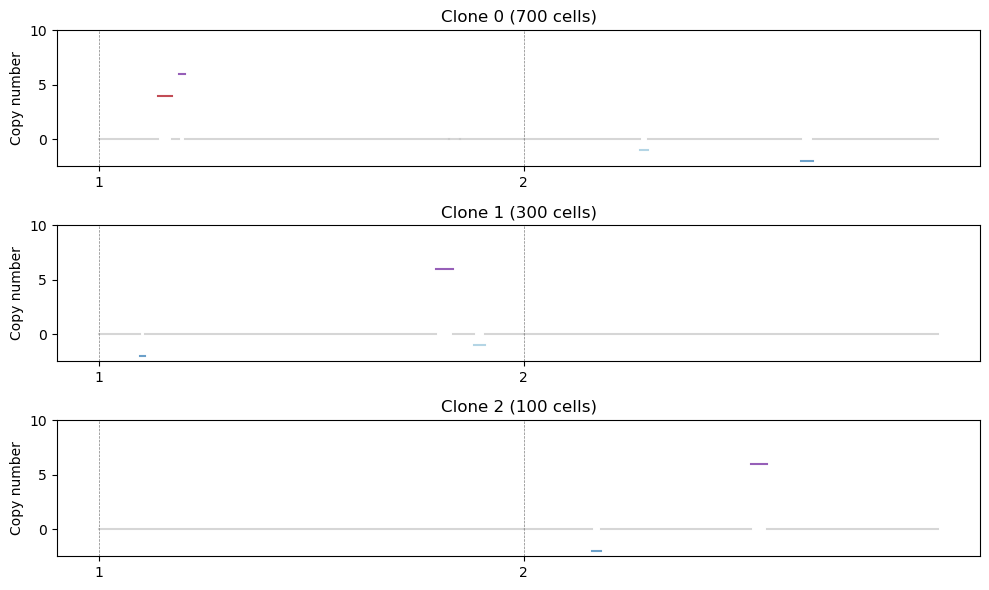

Saved figure to /data1/shahs3/users/sunge/cnv_simulator/figs/minitest_c3_4/true_cnv_profile.png


In [153]:
plot_true_cnv(data_cnv_profile_df, clone_cell_count_lst, save = True)

In [114]:
synthetic_bed_dir = f"{BASEDIR}/synthetic_bams/{test_name}_{group_name}_cnv_depth"

bed_df = pd.read_csv(
    f"{synthetic_bed_dir}/clone1.regions.bed.gz",
    sep = "\t",
    compression = "gzip",
    header = None,
    names = ["chr", "start", "end", "coverage"])

bed_df = bed_df.loc[bed_df["chr"].isin([1, 2])]

bed_df

/tmp/ipykernel_3270534/2802207529.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  bed_df = pd.read_csv(


,chr,start,end,coverage
0,1,0,1000,0.0
1,1,1000,2000,0.0
2,1,2000,3000,0.0
3,1,3000,4000,0.0
4,1,4000,5000,0.0
...,...,...,...,...
492446,2,243195000,243196000,0.0
492447,2,243196000,243197000,0.0
492448,2,243197000,243198000,0.0
492449,2,243198000,243199000,0.0


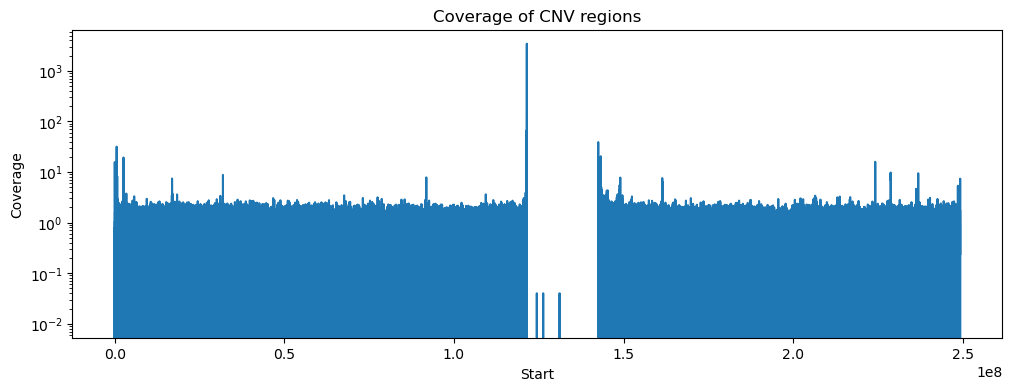

In [116]:
bed_df_chr1 = bed_df.loc[bed_df["chr"] == 1]

plt.figure(figsize = (12, 4))
plt.plot(bed_df_chr1["start"], bed_df_chr1["coverage"])
plt.yscale("log")
plt.xlabel("Start")
plt.ylabel("Coverage")
plt.title("Coverage of CNV regions")
plt.show()

In [157]:
def plot_read_density_heatmap(cell_read_positions, bin_start, bin_end, num_bins = 50, vmax = None):
    """
    Plots a heatmap of read density in sub-bins for each cell.

    Args:
        cell_read_positions (dict): Dictionary mapping cell IDs to lists of read start positions.
        bin_start (int): Start coordinate of the bin.
        bin_end (int): End coordinate of the bin.
        num_bins (int): Number of sub-bins to divide the bin into.
    """
    print(bin_start, bin_end)

    # Initialize a matrix to store the histogram for each cell
    cell_ids = list(cell_read_positions.keys())
    cell_ids.sort()
    heatmap_data = np.zeros((len(cell_ids), num_bins))

    # Define bin edges
    bin_edges = np.linspace(bin_start, bin_end, num_bins + 1)

    # Populate the heatmap data
    for i, cell_id in enumerate(cell_ids):
        read_positions = np.array(cell_read_positions[cell_id])
        hist, _ = np.histogram(read_positions, bins=bin_edges)
        heatmap_data[i, :] = hist
    # Plot the heatmap
    plt.figure(figsize=(10, len(cell_ids) * 0.01))
    cluster_plt = sns.clustermap(
        heatmap_data, 
        cmap = "viridis",
        cbar = True,
        cbar_pos = (1.03, 0.6, 0.03, 0.2),
        row_cluster = True,
        col_cluster = False,
        xticklabels = False,
        yticklabels = False,
        dendrogram_ratio = (0.01, 0.01),
        vmax = vmax,
        cbar_kws = {"label": "Read Depth"}
    )
    cluster_plt.ax_heatmap.set_ylabel("Cells")
    cluster_plt.ax_heatmap.set_title("Read Depth Heatmap")

    plt.show()
    return heatmap_data

def extract_read_positions(bam_file, chrom, start, end, cell_ids):
    """
    Extracts read start positions from a BAM file for a given genomic bin,
    grouped by cell (based on the RG tag).
    
    Args:
        bam_file (str): Path to the BAM file.
        chrom (str): Chromosome name (e.g., "chr1").
        start (int): Start coordinate of the bin.
        end (int): End coordinate of the bin.
    
    Returns:
        dict: A dictionary where keys are cell IDs (from RG tags) and values are lists of read start positions.
    """
    cell_reads = defaultdict(list)

    with pysam.AlignmentFile(bam_file, "rb") as bam:
        for read in bam.fetch(chrom, start, end):
            
            if read.is_secondary or read.is_supplementary:
                continue  # Ignore secondary/supplementary alignments
            
            if read.is_read1 and read.has_tag("CB"):  
                cell_id = read.get_tag("CB")
                if cell_id in cell_ids: 
                    cell_reads[cell_id].append(read.reference_start)  # Store read start position

    return cell_reads


In [154]:
clone_cell_id_dict = {}
for _, clone in enumerate(clone_cnv_profile_df["clone"].unique()):
    if clone != -1:
        clone_cell_id_dict[f"clone{clone}"] = set(clone_cnv_profile_df.loc[clone_cnv_profile_df["clone"] == clone, "cell_barcode"].values[0].split(","))

print(clone_cell_id_dict.keys())

dict_keys(['clone0', 'clone1', 'clone2'])


In [155]:
chr1_end = 249250621
chr2_end = 243199373

synthetic_bam_dir = f"{BASEDIR}/synthetic_bams"

clone2_chr1_baseline_read_pos = extract_read_positions(
    f"{synthetic_bam_dir}/{test_name}_baseline_cells.bam",
    "1",
    0,
    chr1_end,
    clone_cell_id_dict["clone2"]
)

clone2_chr2_baseline_read_pos = extract_read_positions(
    f"{synthetic_bam_dir}/{test_name}_baseline_cells.bam",
    "2",
    0,
    chr2_end,
    clone_cell_id_dict["clone2"]
)

clone2_chr1_read_pos = extract_read_positions(
    f"{synthetic_bam_dir}/{test_name}_final_sorted_cnv.bam",
    "1",
    0,
    chr1_end,
    clone_cell_id_dict["clone2"]
)

clone2_chr2_read_pos = extract_read_positions(
    f"{synthetic_bam_dir}/{test_name}_final_sorted_cnv.bam",
    "2",
    0,
    chr2_end,
    clone_cell_id_dict["clone2"]
)

0 243199373


/home/sunge/conda_envs/scanpy_env/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x100 with 0 Axes>

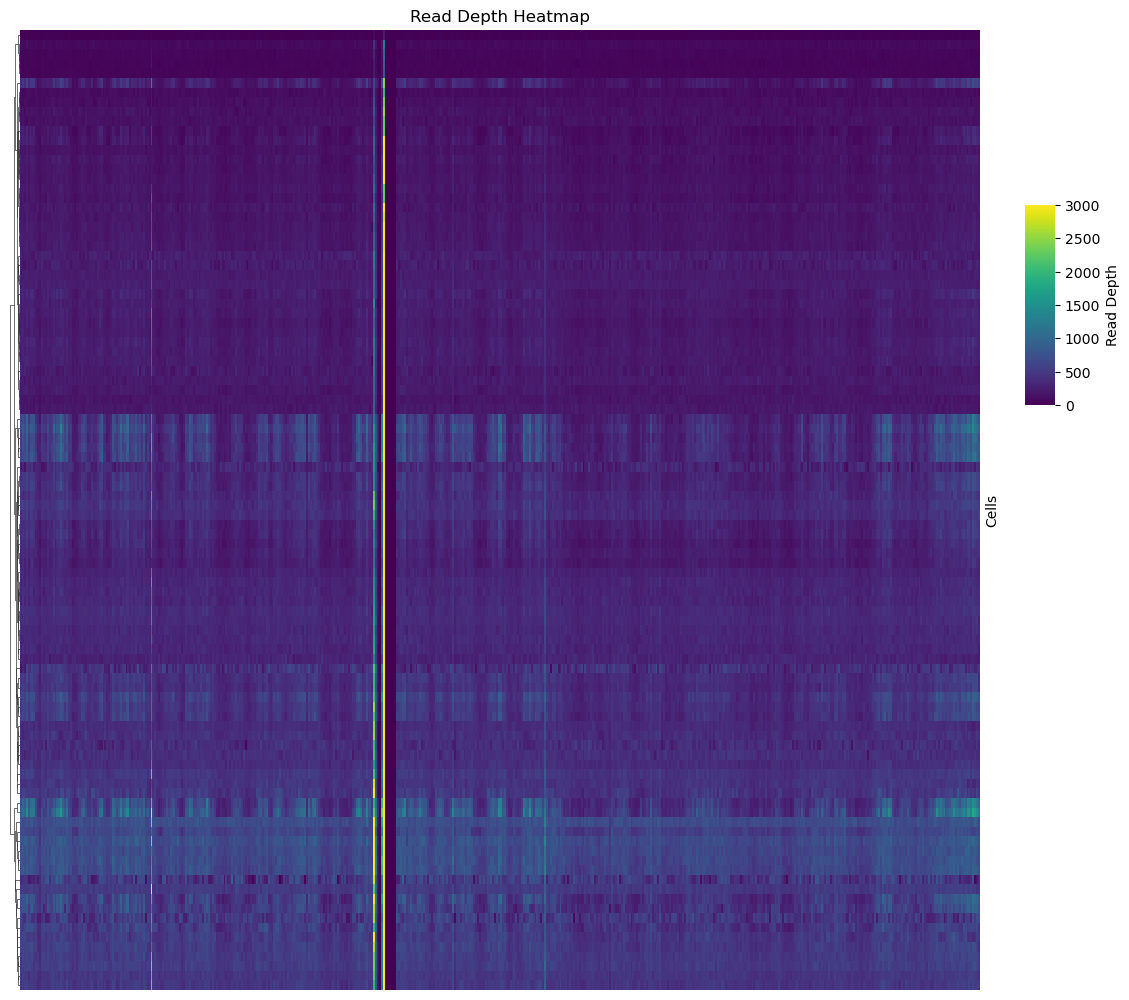

array([[359., 478., 356., ..., 608., 604., 534.],
       [469., 642., 568., ..., 761., 622., 658.],
       [750., 816., 725., ..., 887., 790., 676.],
       ...,
       [ 65.,  72.,  73., ...,  78.,  77.,  83.],
       [185., 191., 179., ..., 219., 230., 193.],
       [143., 186., 185., ..., 203., 196., 195.]])

In [160]:
plot_read_density_heatmap(clone2_chr2_baseline_read_pos, 0, chr2_end, num_bins = 500, vmax = 3000)